In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
beer_df = pd.read_csv("beer.csv")
beer_df

,name,calories,sodium,alcohol,cost
0,Budweiser,144,15,4.7,0.43
1,Schlitz,151,19,4.9,0.43
2,Lowenbrau,157,15,0.9,0.48
3,Kronenbourg,170,7,5.2,0.73
4,Heineken,152,11,5.0,0.77
5,Old_Milwaukee,145,23,4.6,0.28
6,Augsberger,175,24,5.5,0.40
7,Srohs_Bohemian_Style,149,27,4.7,0.42
8,Miller_Lite,99,10,4.3,0.43
9,Budweiser_Light,113,8,3.7,0.40


In [6]:
from sklearn.preprocessing import StandardScaler

In [8]:
scaler = StandardScaler()
scaled_beer_df = scaler.fit_transform(beer_df[['calories','sodium','alcohol','cost']])

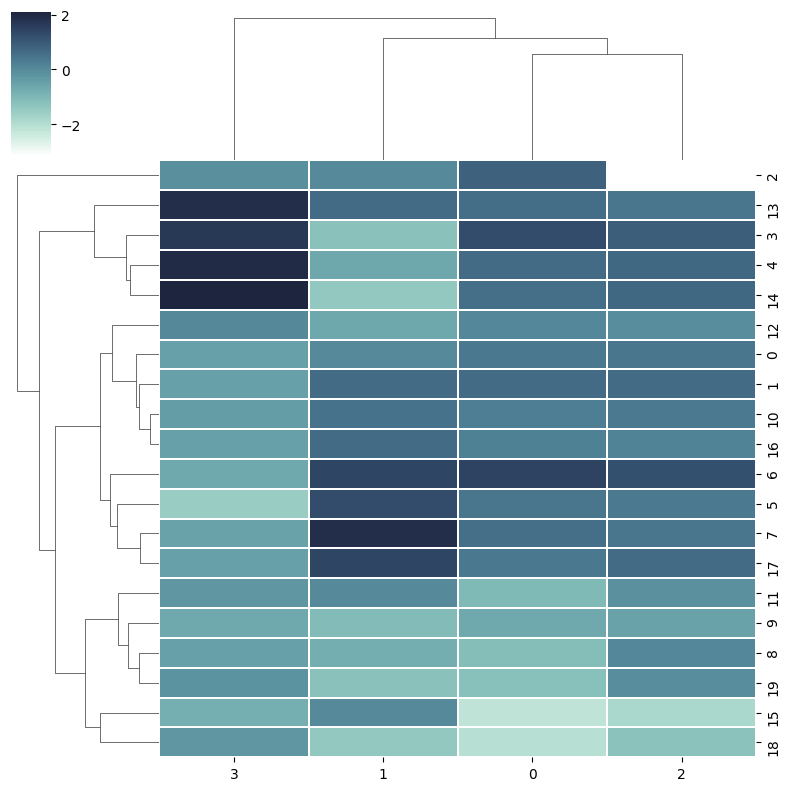

In [10]:
cmap = sns.cubehelix_palette(as_cmap = True, rot = -.3, light = 1)
sns.clustermap(scaled_beer_df, cmap = cmap, linewidths = .2, figsize = (8,8));

In [12]:
beer_df.iloc[[10,16]]

,name,calories,sodium,alcohol,cost
10,Coors,140,18,4.6,0.44
16,Hamms,139,19,4.4,0.43


In [14]:
beer_df.iloc[[2,18]]

,name,calories,sodium,alcohol,cost
2,Lowenbrau,157,15,0.9,0.48
18,Olympia_Goled_Light,72,6,2.9,0.46


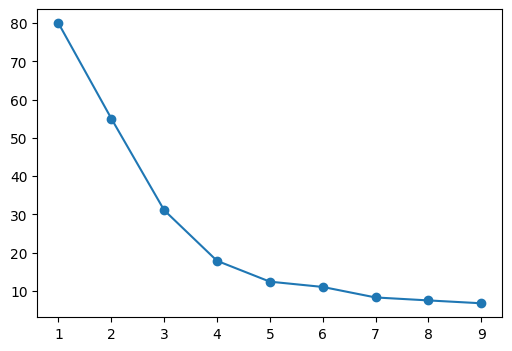

In [16]:
from sklearn.cluster import KMeans

cluster_range = range(1,10)
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters)
    clusters.fit(scaled_beer_df)
    cluster_errors.append(clusters.inertia_)

plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = "o")

#### HIERARCHICAL CLUSTERING

In [18]:
from sklearn.cluster import AgglomerativeClustering

In [20]:
h_clusters = AgglomerativeClustering(3)
h_clusters.fit(scaled_beer_df)
beer_df["h_clusterid"] = h_clusters.labels_

In [22]:
beer_df[beer_df.h_clusterid == 0]

,name,calories,sodium,alcohol,cost,h_clusterid
2,Lowenbrau,157,15,0.9,0.48,0
8,Miller_Lite,99,10,4.3,0.43,0
9,Budweiser_Light,113,8,3.7,0.40,0
11,Coors_Light,102,15,4.1,0.46,0
12,Michelob_Light,135,11,4.2,0.50,0
15,Pabst_Extra_Light,68,15,2.3,0.38,0
18,Olympia_Goled_Light,72,6,2.9,0.46,0
19,Schlitz_Light,97,7,4.2,0.47,0


In [26]:
beer_df[beer_df.h_clusterid == 1]

,name,calories,sodium,alcohol,cost,h_clusterid
0,Budweiser,144,15,4.7,0.43,1
1,Schlitz,151,19,4.9,0.43,1
5,Old_Milwaukee,145,23,4.6,0.28,1
6,Augsberger,175,24,5.5,0.40,1
7,Srohs_Bohemian_Style,149,27,4.7,0.42,1
10,Coors,140,18,4.6,0.44,1
16,Hamms,139,19,4.4,0.43,1
17,Heilemans_Old_Style,144,24,4.9,0.43,1


In [28]:
beer_df[beer_df.h_clusterid == 2]

,name,calories,sodium,alcohol,cost,h_clusterid
3,Kronenbourg,170,7,5.2,0.73,2
4,Heineken,152,11,5.0,0.77,2
13,Becks,150,19,4.7,0.76,2
14,Kirin,149,6,5.0,0.79,2
